In [11]:
from models import PBFTPK, MultiPBFTPK, MainModel
import numpy as np

In [12]:
samples = np.load('samples.npy')

In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.preprocessing import MinMaxScaler as Scaler

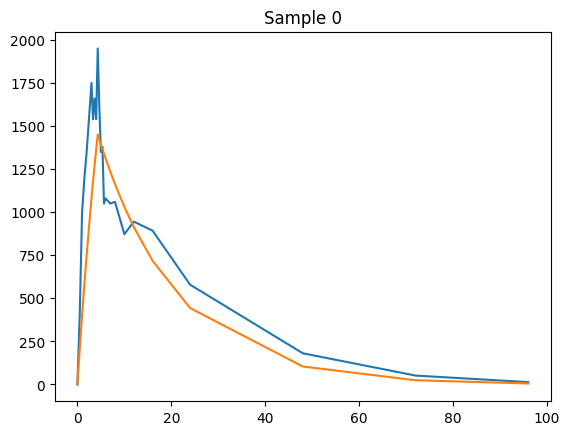

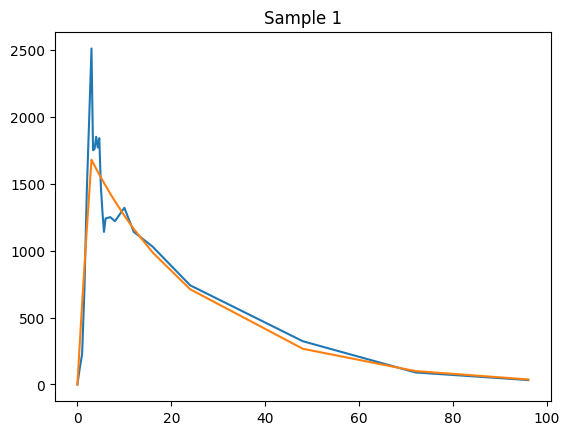

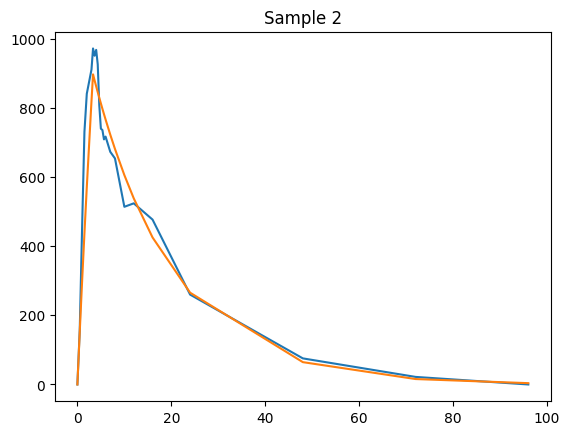

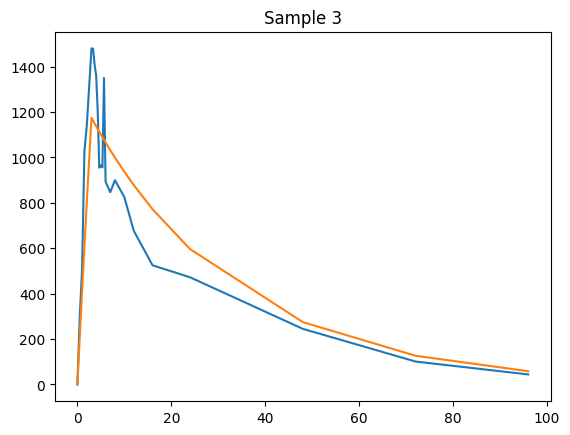

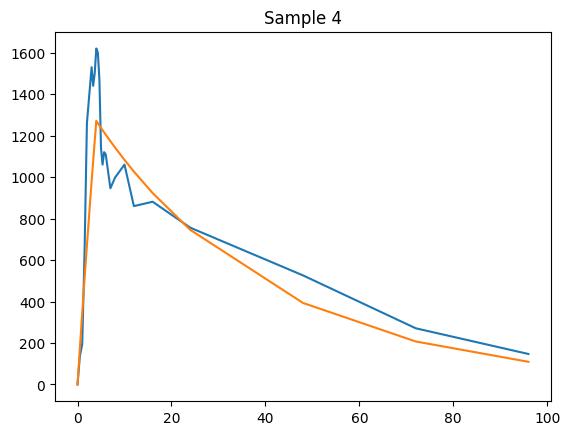

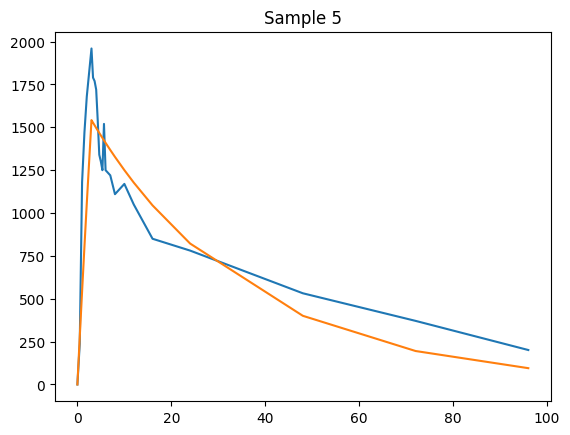

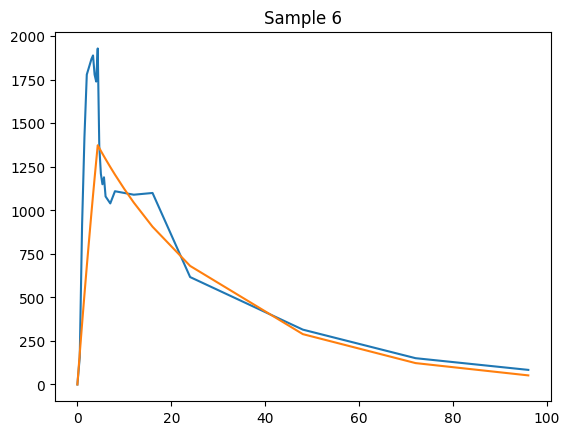

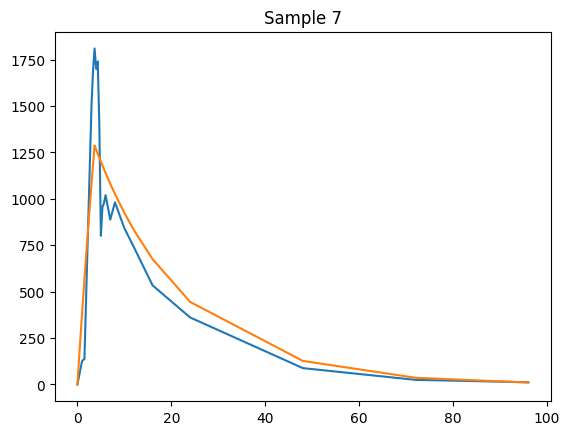

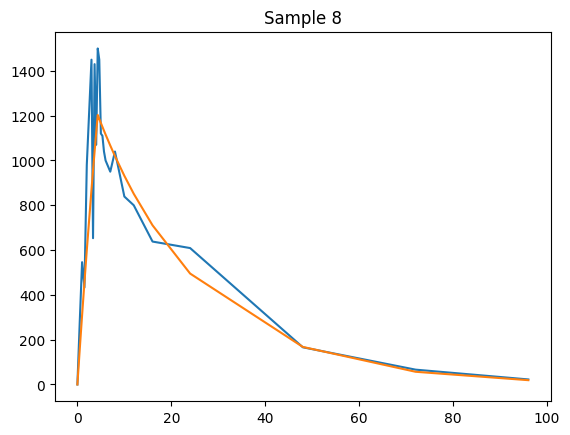

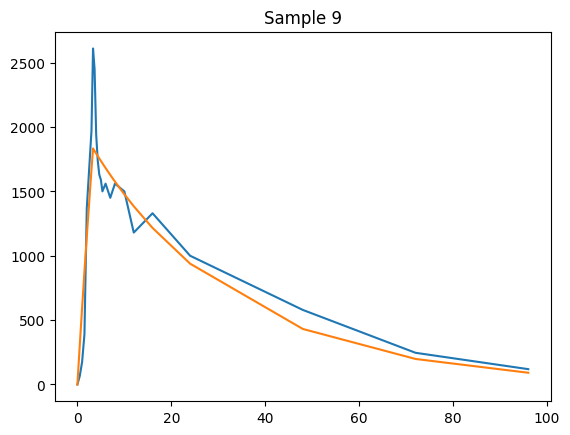

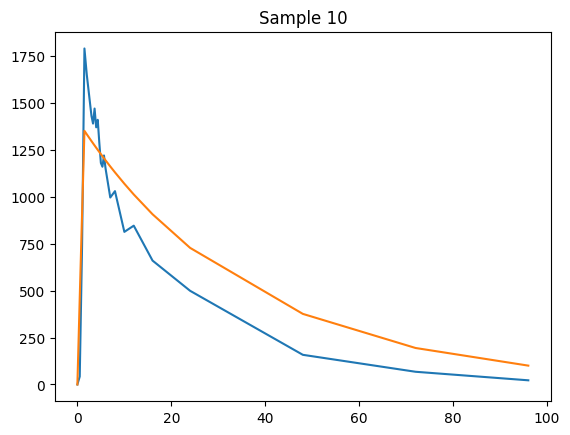

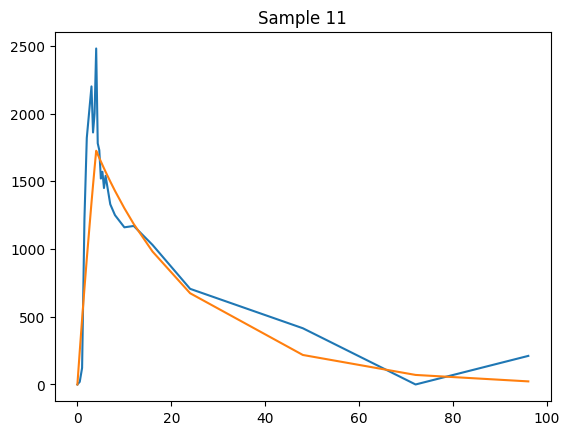

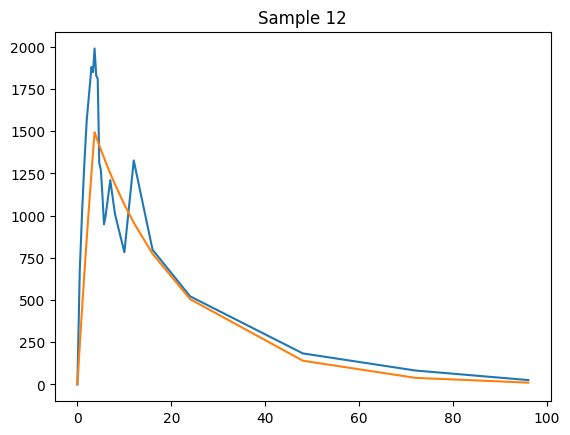

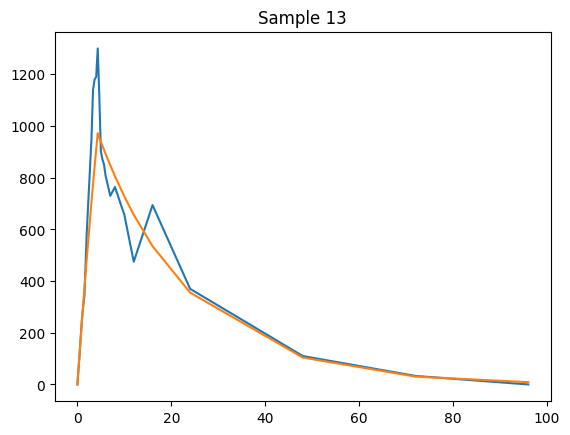

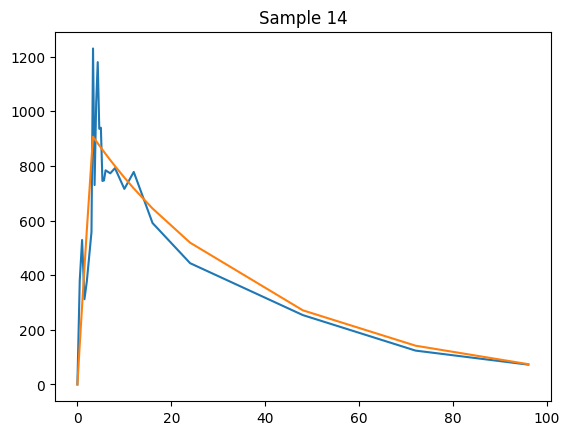

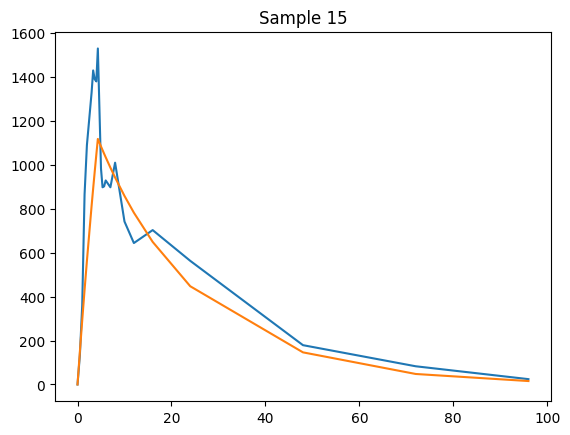

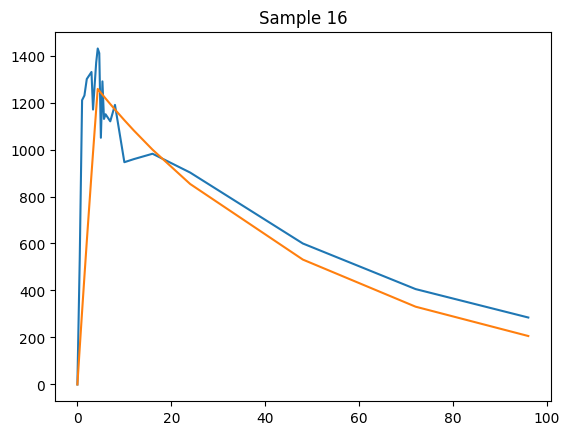

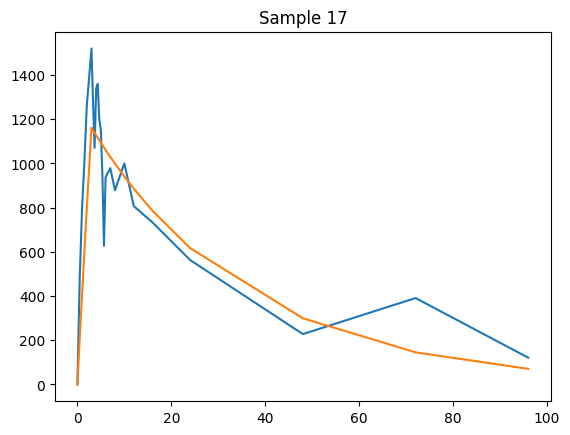

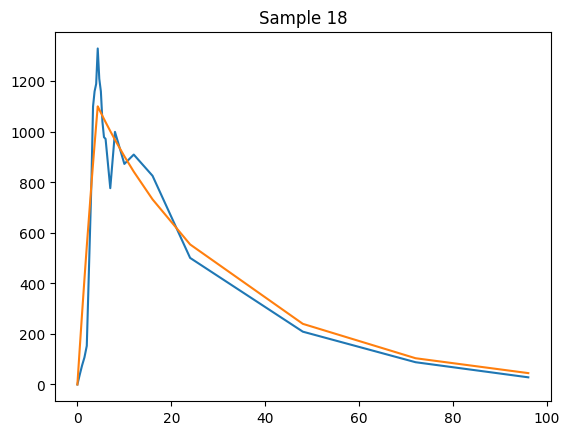

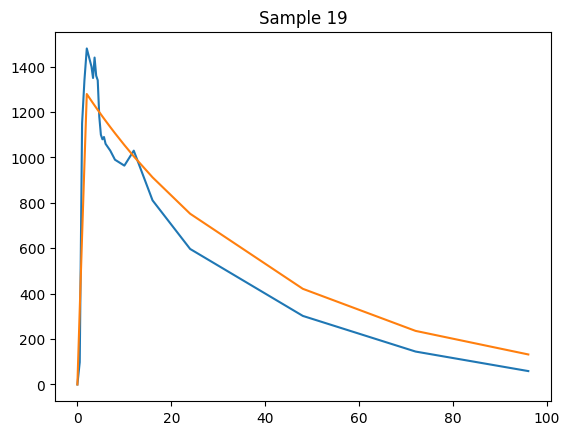

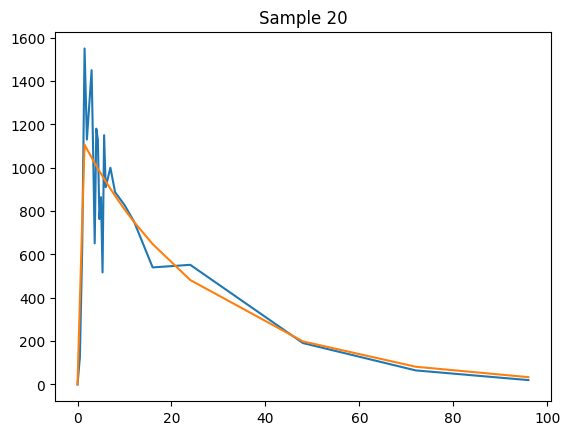

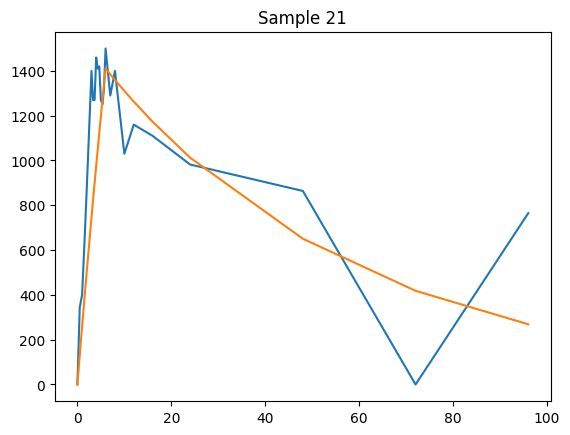

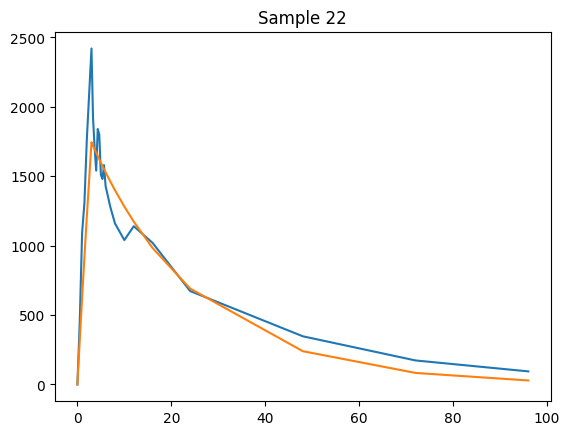

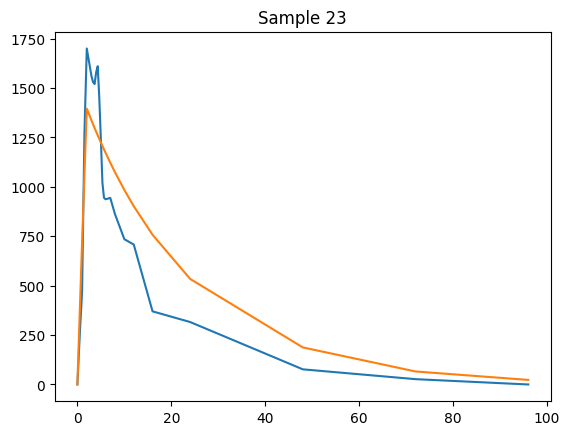

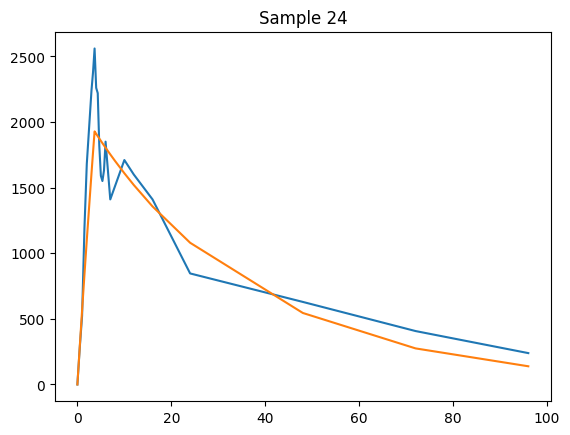

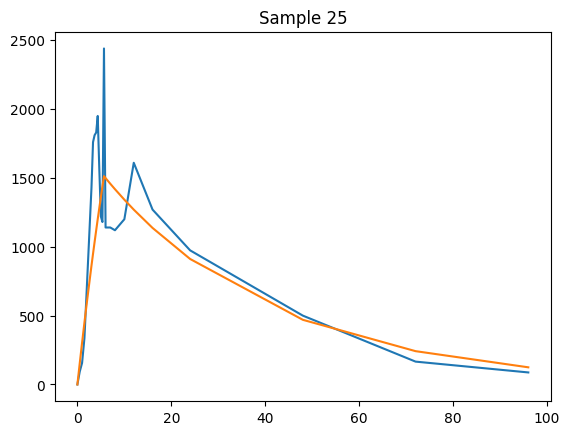

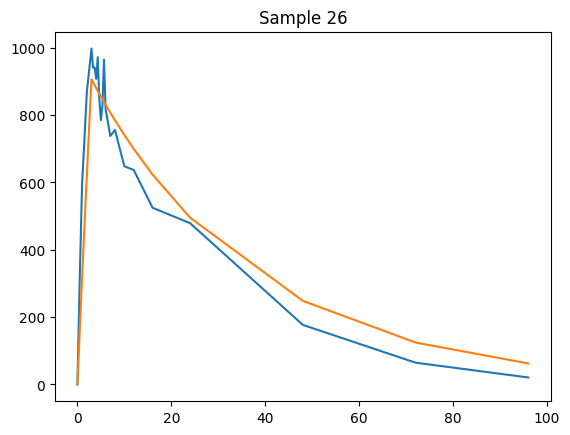

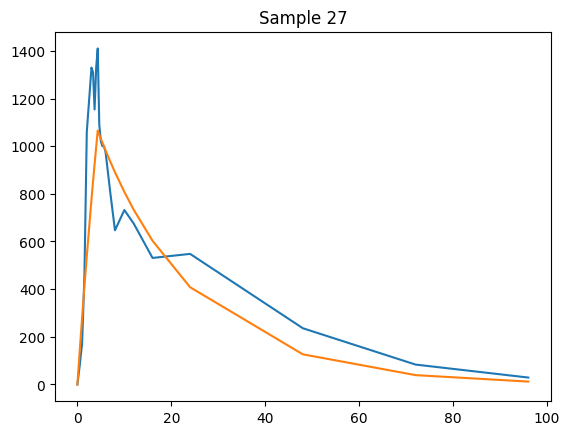

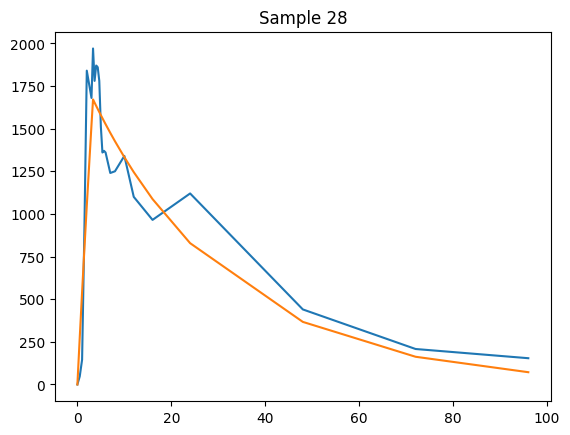

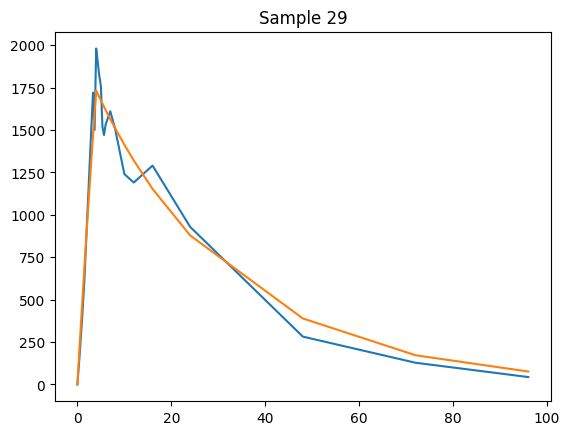

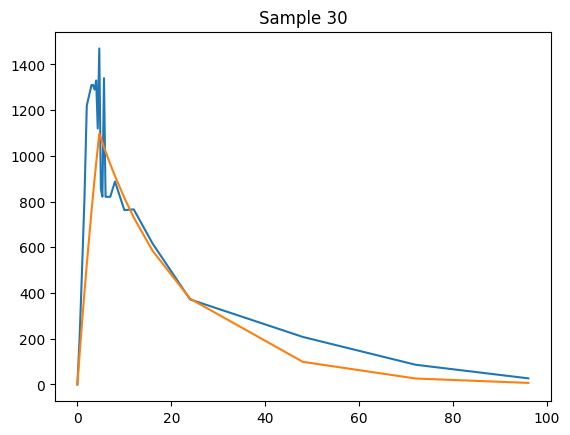

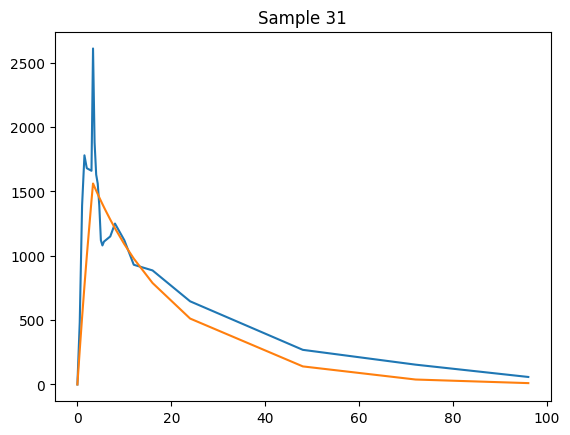

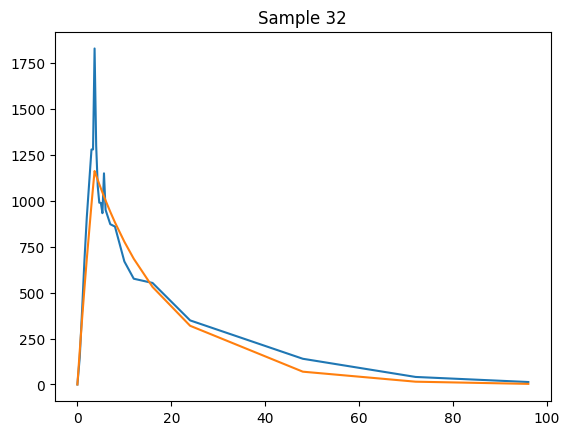

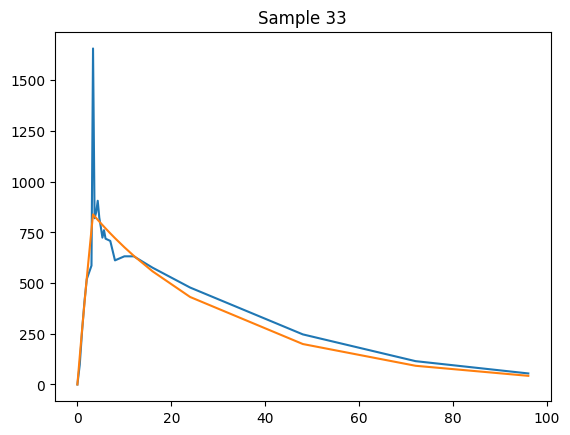

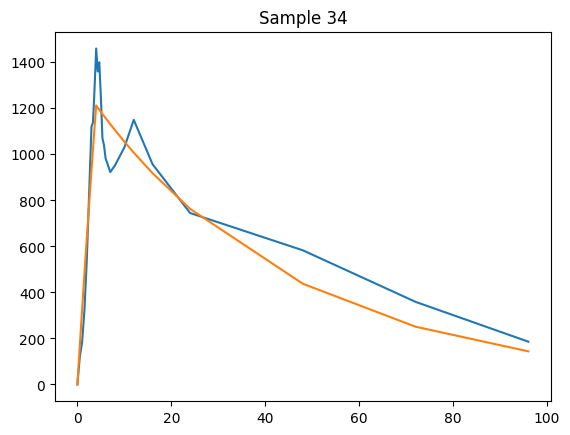

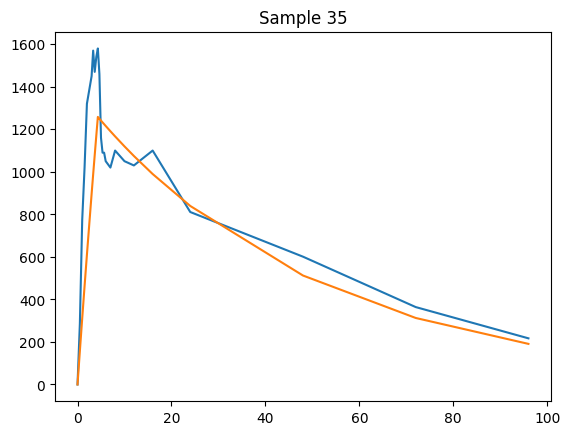

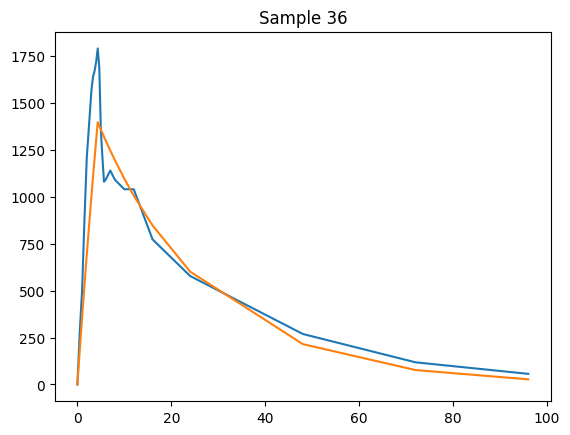

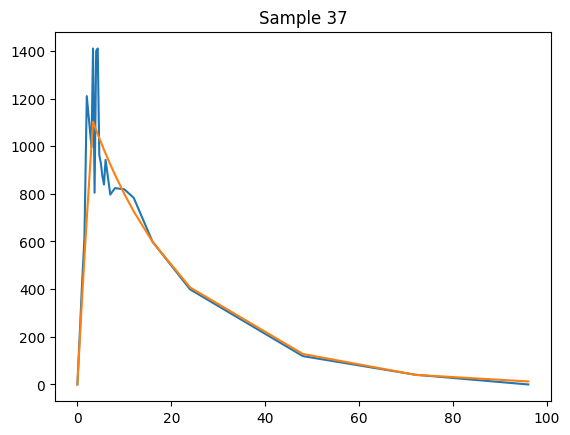

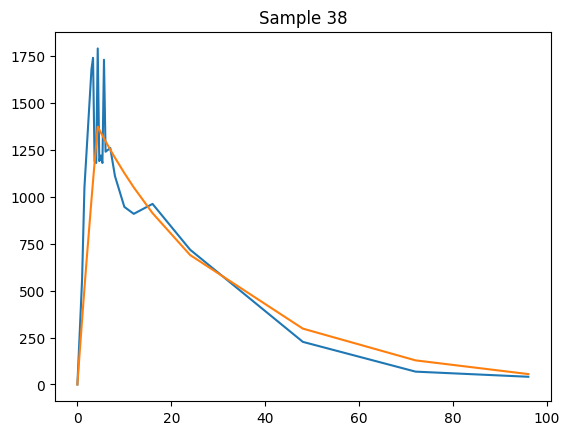

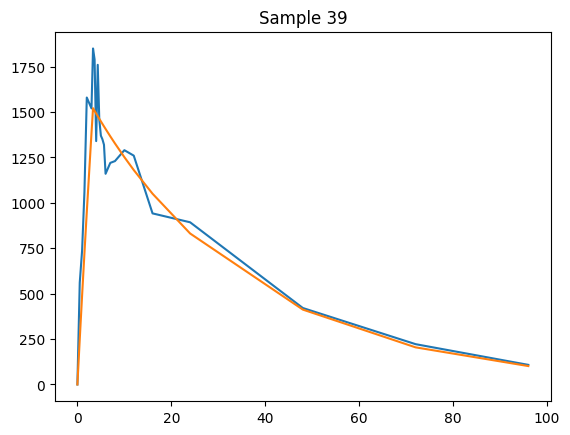

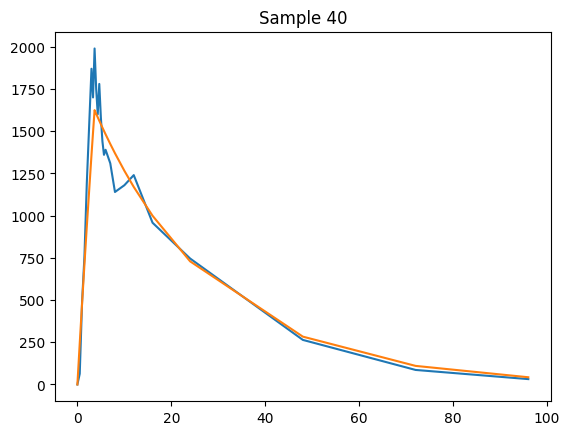

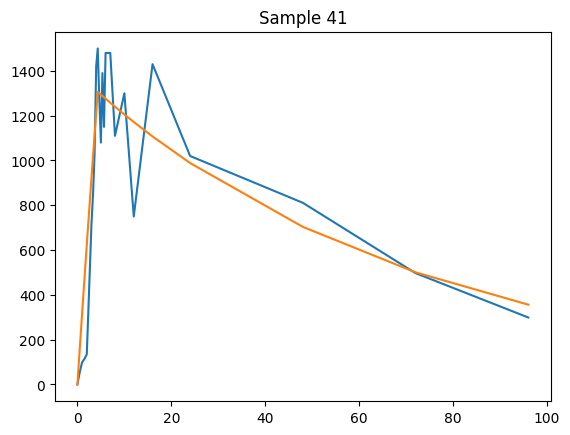

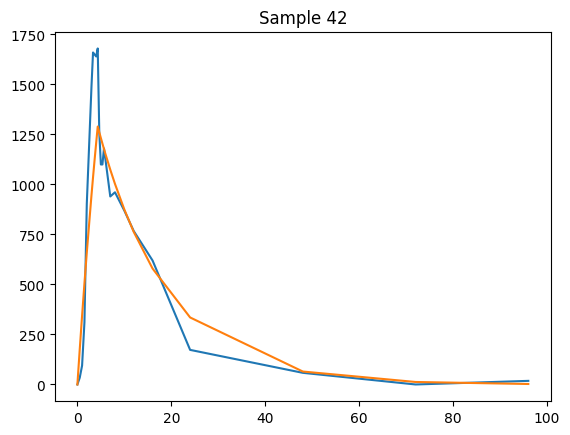

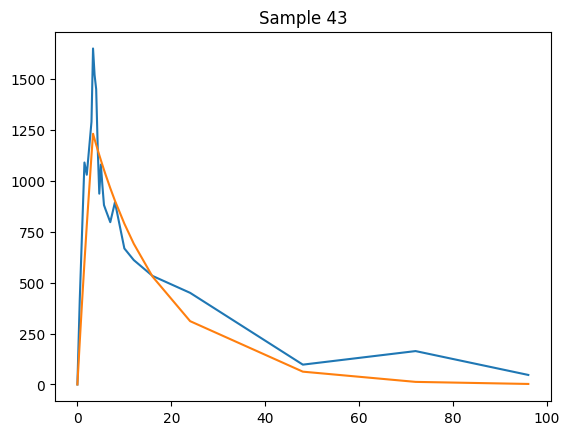

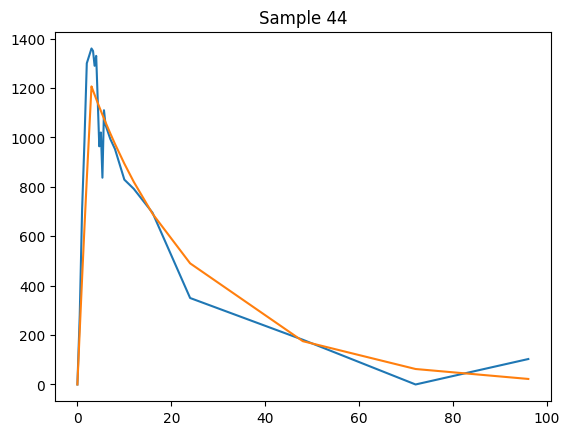

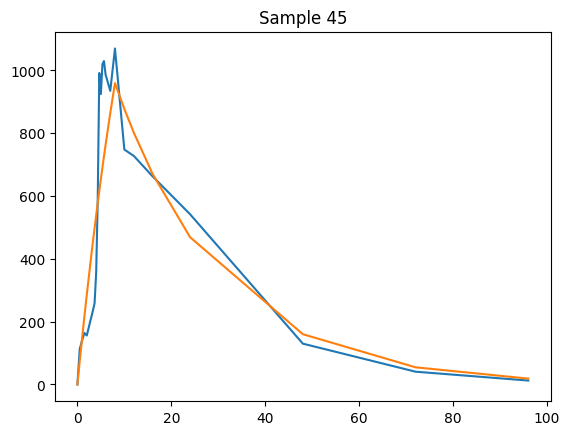

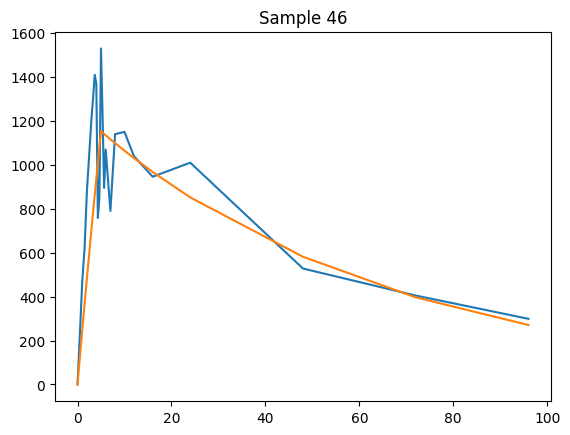

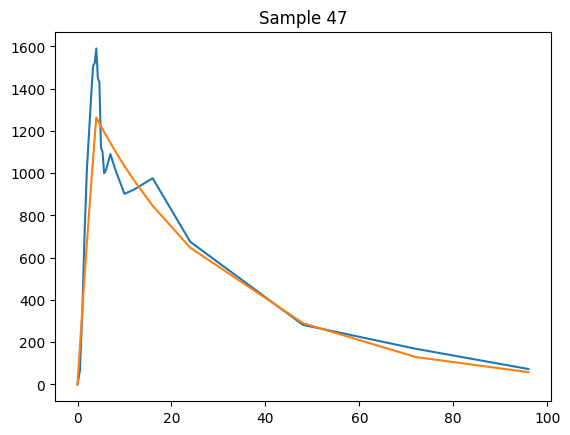

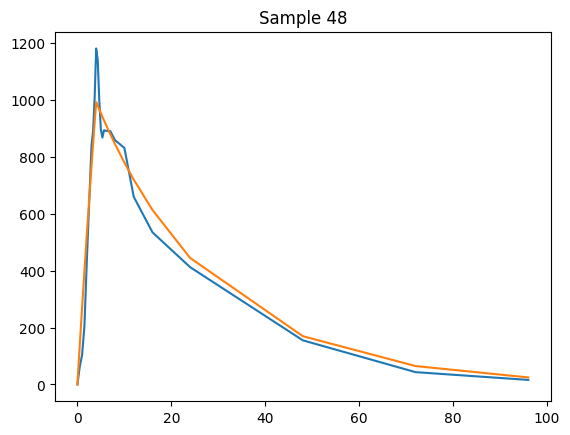

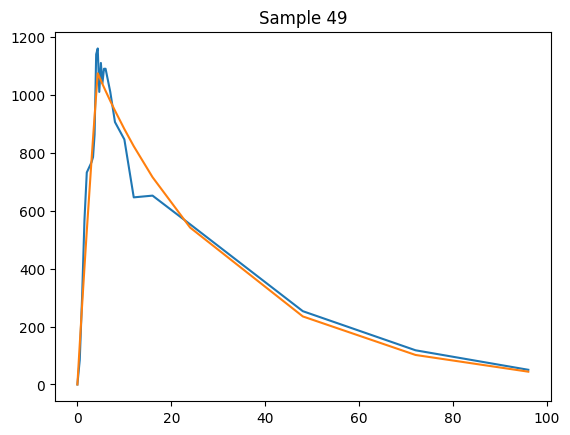

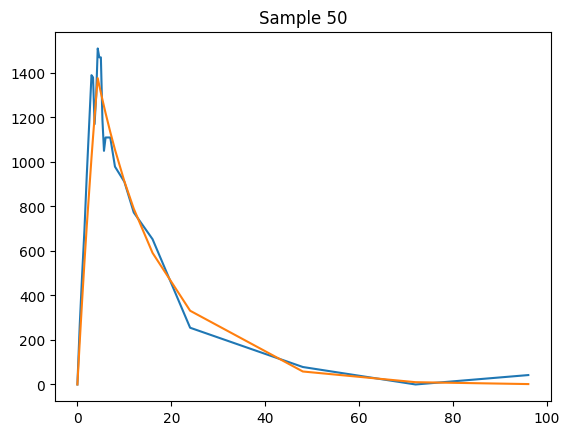

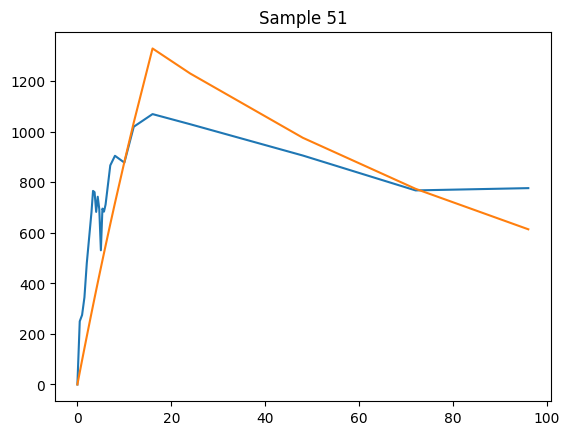

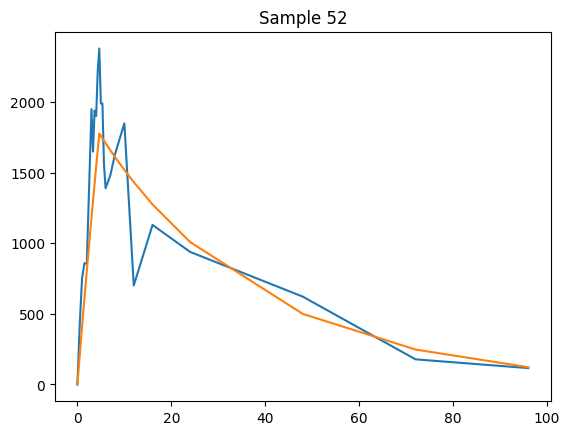

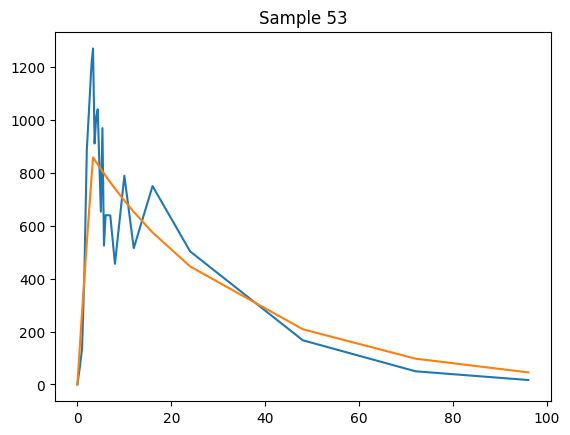

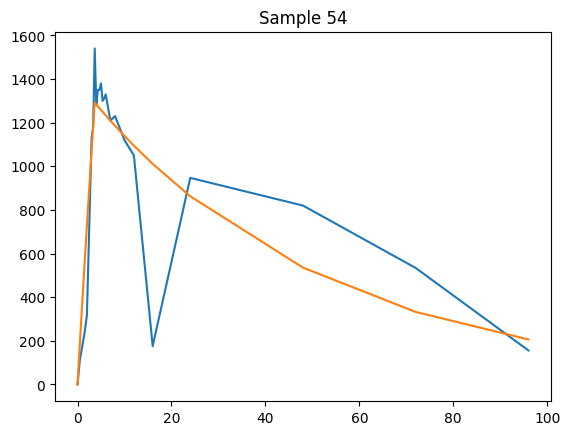

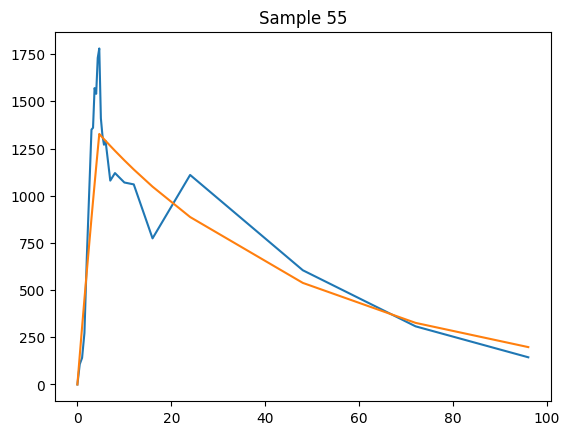

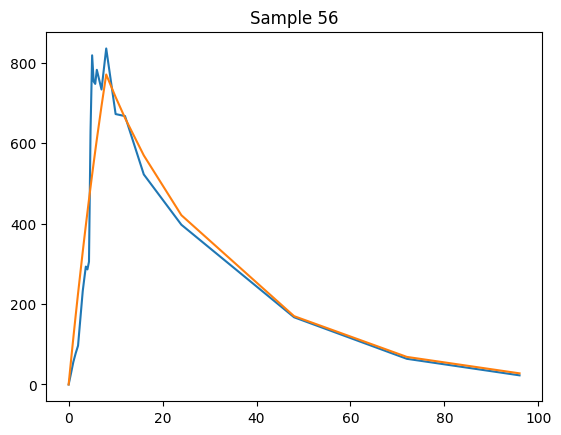

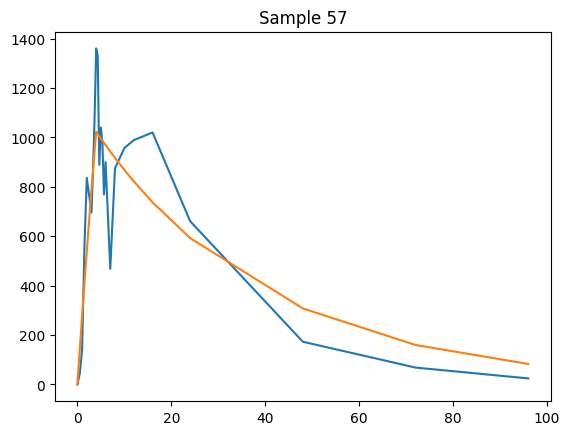

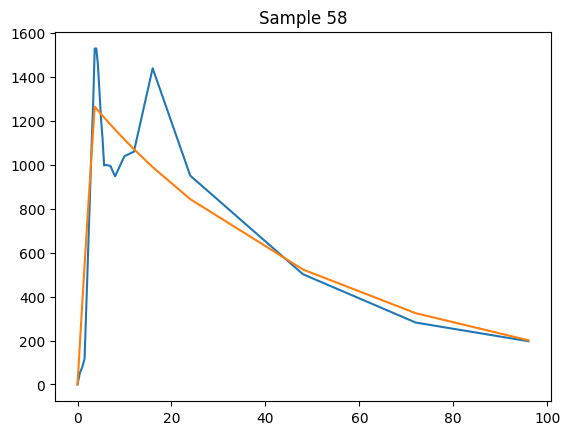

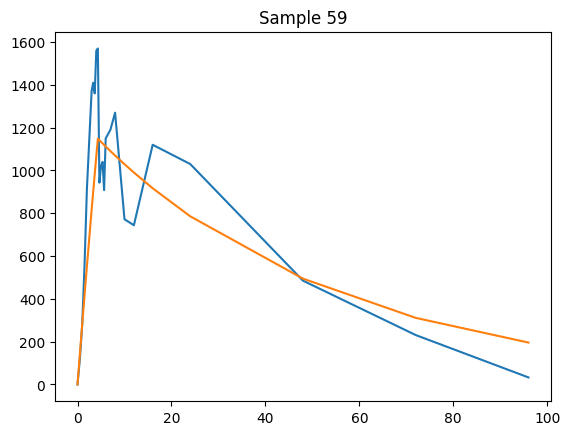

In [16]:
r = []
for i, (t, X) in enumerate(samples):
    X_scaler = Scaler().fit(X.reshape((-1, 1)))
    t_scaler = Scaler().fit(t.reshape((-1, 1)))
    X = X_scaler.transform(X.reshape((-1, 1))).reshape((-1))
    t = t_scaler.transform(t.reshape((-1, 1))).reshape((-1))

    multimodel = MultiPBFTPK(tau=[t[np.argmax(X), ]], alpha=[5.0, ])
    multimodel.fit(t, X)
    X_sample = multimodel.sample(t)

    t = t_scaler.inverse_transform(t.reshape((-1, 1))).reshape((-1))
    X = X_scaler.inverse_transform(X.reshape((-1, 1))).reshape((-1))
    X_sample = X_scaler.inverse_transform(
        X_sample.reshape((-1, 1))).reshape((-1))

    r.append(X-X_sample)

    plt.title(f"Sample {i}")
    plt.plot(t, X)
    plt.plot(t, X_sample)
    plt.show()

In [17]:
m = np.mean(r, axis=0)
s = np.var(r, axis=0)

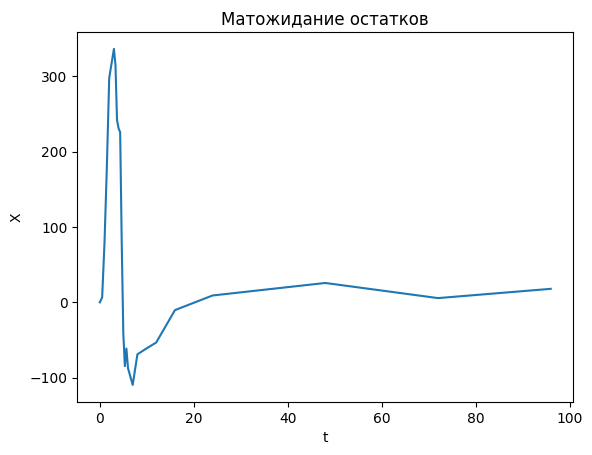

In [22]:
plt.title("Матожидание остатков")
plt.xlabel('t')
plt.ylabel('X')
plt.plot(t, m)

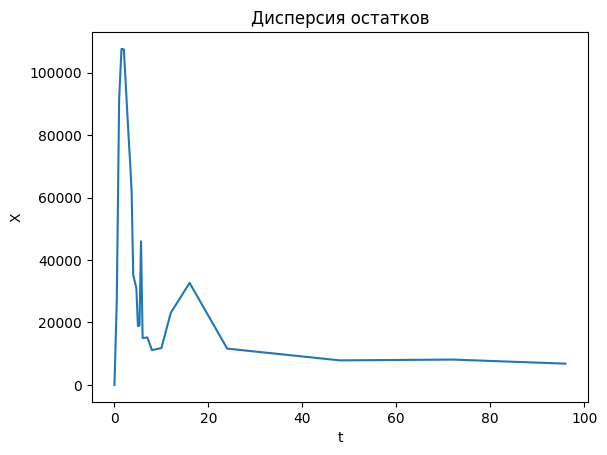

In [23]:
plt.title("Дисперсия остатков")
plt.xlabel('t')
plt.ylabel('X')
plt.plot(t, s)